<center>
    <h2><b>Homework 3</b></h2>

Martim Aires de Sousa - 106468  
Cristiano Pantea - 106324
</center>

## <center><b>Programming</b></center>

### **Loading dataset**

In [3]:
import pandas as pd

# Loading dataset
df = pd.read_csv('parkinsons.csv')

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

### **Exercício 5**

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\AppDa

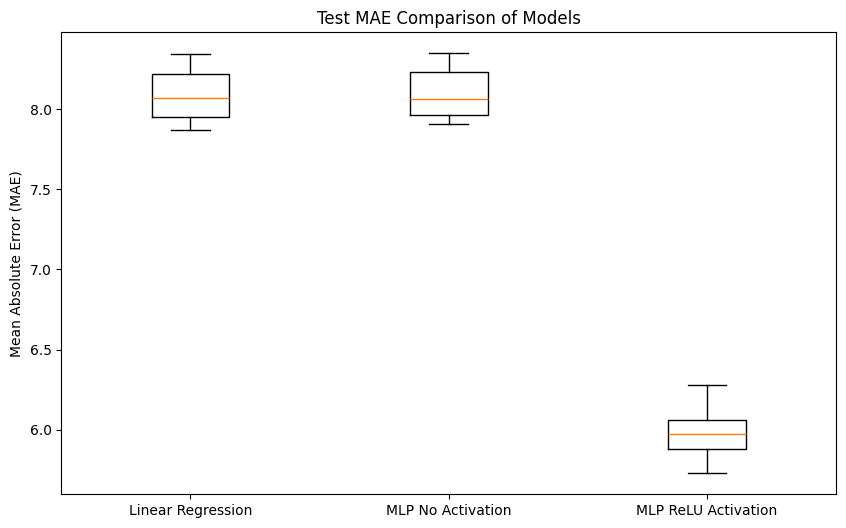

In [5]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Store results of each model
mae_results = {
    'Linear Regression': [],
    'MLP No Activation': [],
    'MLP ReLU Activation': []
}

# Train models and evaluate using 10 different train-test splits
for i in range(1, 11):
    # Split the data (different random_state for each iteration)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Linear Regression Model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    mae_results['Linear Regression'].append(mae_lr)

    # MLP Regressor with no activation function
    mlp_no_act_model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0)
    mlp_no_act_model.fit(X_train, y_train)
    y_pred_mlp_no_act = mlp_no_act_model.predict(X_test)
    mae_mlp_no_act = mean_absolute_error(y_test, y_pred_mlp_no_act)
    mae_results['MLP No Activation'].append(mae_mlp_no_act)

    # MLP Regressor with ReLU activation function
    mlp_relu_model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
    mlp_relu_model.fit(X_train, y_train)
    y_pred_mlp_relu = mlp_relu_model.predict(X_test)
    mae_mlp_relu = mean_absolute_error(y_test, y_pred_mlp_relu)
    mae_results['MLP ReLU Activation'].append(mae_mlp_relu)

# Create a boxplot for the MAE of each model
plt.figure(figsize=(10, 6))
plt.boxplot([mae_results['Linear Regression'], mae_results['MLP No Activation'], mae_results['MLP ReLU Activation']],
            tick_labels=['Linear Regression', 'MLP No Activation', 'MLP ReLU Activation'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Test MAE Comparison of Models')
plt.show()


### **Exercício 6**

Uma regressão linear é um modelo simples capaz de estabelecer relações entre as features e o target. Este modelo assume que os dados podem ser modelados através de uma reta (ou plano, etc. para dimensões maiores). Está, portanto, limitada para capturar relações não lineares complexas.

Um modelo MLP sem funções de ativação é equivalente a uma regressão linear. Se não tiver funções de ativação não lineares, o output da rede neuronal será sempre uma transformação linear do input (independentemente do número de camadas).

Assim, e tal como podemos observar no gráfico do exercício anterior, uma rede neuronal e um modelo MLP sem funções de ativação vão ter resultados idênticos.

Entende-se, portanto, a importância de funções de ativação não lineares nos modelos MLP. Ao incluir funções de ativação, o modelo torna-se capaz de capturar padrões mais complexos, incluindo relações não lineares (interações entre as variáveis que seriam impossíveis de identificar com uma simples transformação linear). Isto permite que o modelo MLP aprenda representações mais completas e flexíveis dos dados, melhorando a sua capacidade de generalizar para novos inputs. Embora esta flexibilidade possa aumentar o risco de overfitting, também possibilita ao modelo extrair padrões complexos que a regressão linear não consegue capturar.

### **Exercício 7**

In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameter grid for Grid Search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],        # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],  # Learning rate
    'batch_size': [32, 64, 128]            # Batch size
}

# Initialize the MLP Regressor (2 hidden layers with 10 neurons each)
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0)

# Set up GridSearchCV to search for the best combination of parameters
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_mean_absolute_error', verbose=1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get test set predictions with the best estimator and calculate the MAE
y_pred_test = grid_search.best_estimator_.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Print the best combination of hyperparameters and the corresponding test MAE
print(f"Best parameters: {best_params}")
print(f"Test MAE with best parameters: {test_mae:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\AppDa

Best parameters: {'alpha': 0.0001, 'batch_size': 32, 'learning_rate_init': 0.01}
Test MAE with best parameters: 4.5633


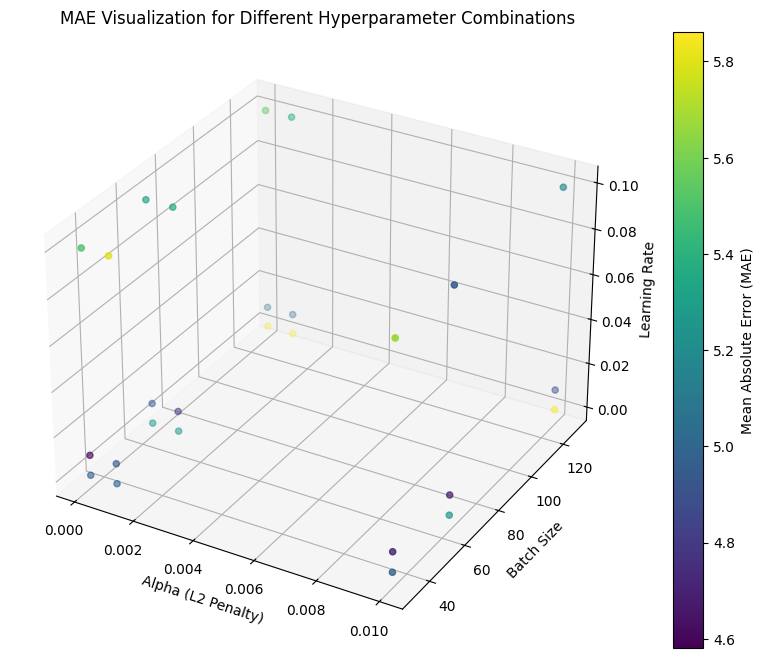

In [14]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Ensure that only numeric columns are used in the aggregation
# Select relevant columns: the parameters and the mean_test_score (i.e., negative MAE)
results_numeric = results[['param_alpha', 'param_batch_size', 'param_learning_rate_init', 'mean_test_score']]

# Extract values for 3D plotting
alphas = results_numeric['param_alpha'].astype(float).values
batch_sizes = results_numeric['param_batch_size'].astype(int).values
learning_rates = results_numeric['param_learning_rate_init'].astype(float).values
mae_values = (-results_numeric['mean_test_score']).values # Convert the negative MAE to positive for interpretation

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot a scatter plot in 3D with Alpha, Batch Size, and Learning Rate, colored by MAE
sc = ax.scatter(alphas, batch_sizes, learning_rates, c=mae_values, cmap='viridis', marker='o')

# Add labels to the axes
ax.set_xlabel('Alpha (L2 Penalty)')
ax.set_ylabel('Batch Size')
ax.set_zlabel('Learning Rate')

# Add a color bar to indicate the MAE scale
plt.colorbar(sc, label='Mean Absolute Error (MAE)')

# Title for the plot
plt.title('MAE Visualization for Different Hyperparameter Combinations')

# Show the plot
plt.show()


Nesta representação em 3D, é possível observar como o desempenho do modelo, medido pelo Erro Absoluto Médio (MAE), varia em função de diferentes combinações de hiperparâmetros: alpha, learning rate e batch size. A barra de cores representa os valores de MAE, com tons mais escuros indicando erros menores - melhor desempenho do modelo.

Uma learning rate mais alta permite que o modelo convirja rapidamente, mas pode resultar em "saltos" sobre a solução ótima, prejudicando a generalização. Em contrapartida, uma learning rate mais baixa torna o treino mais demorado, mas frequentemente resulta num desempenho superior ao explorar soluções de forma mais detalhada.

Valores elevados de alpha proporcionam uma forte regularização, ajudando a reduzir o overfitting ao penalizar pesos excessivos. No entanto, se o valor de alpha for demasiado alto, o modelo pode deixar de identificar padrões relevantes nos dados. Por outro lado, valores baixos de alpha diminuem a regularização, permitindo um melhor ajuste aos dados de treinamento, mas aumentando o risco de overfitting.

Quanto ao batch size, um valor reduzido atualiza os pesos com mais frequência, gerando uma aprendizagem mais "ruidosa" que pode ajudar o modelo a evitar mínimos locais, embora demore mais para convergir. Em contraste, valores grandes de batch size processam mais dados antes de realizar atualizações, resultando em mudanças mais precisas e estáveis, mas que podem tornar a aprendizagem menos variável, possivelmente fazendo com que o modelo fique preso em mínimos locais.

No gráfico, observamos claramente a vantagem de utilizar valores mais baixos de batch size e learning rate, como esperado. No caso de alpha, no entanto, abordagens mais extremas parecem funcionar melhor. Tanto um alpha baixo (que permite ao modelo aprender relações mais complexas entre os dados) como um alpha alto (que simplifica o modelo) produzem melhores resultados do que valores intermédios.